### Exploratory Data analysis

In [1]:
# loading the libraries
import pandas as pd
import numpy as np
# Read dataset using pandas
df = pd.read_csv(r'C:\Users\aryan\Downloads\employees.csv')
df.head(3)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance


In [2]:
# column names
df.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [3]:
# number of rows and columns
df.shape

(1000, 8)

In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [5]:
df['Start Date']

0      08-06-1993
1       3/31/1996
2       4/23/1993
3      03-04-2005
4       1/24/1998
          ...    
995    11/23/2014
996     1/31/1984
997     5/20/2013
998     4/20/2013
999     5/15/2012
Name: Start Date, Length: 1000, dtype: object

In [6]:
# convert 'Start Date' column to datetime datatype
df['Start Date'] = pd.to_datetime(df['Start Date'], format = 'mixed') # %y/%m/%d

In [7]:
df['Start Date']

0     1993-08-06
1     1996-03-31
2     1993-04-23
3     2005-03-04
4     1998-01-24
         ...    
995   2014-11-23
996   1984-01-31
997   2013-05-20
998   2013-04-20
999   2012-05-15
Name: Start Date, Length: 1000, dtype: datetime64[ns]

In [8]:
df['First Name'] = df['First Name'].astype('string')
df['First Name'].head()

0    Douglas
1     Thomas
2      Maria
3      Jerry
4      Larry
Name: First Name, dtype: string

In [9]:
df['Gender'] = df['Gender'].astype('string')
df['Gender'].head()

0      Male
1      Male
2    Female
3      Male
4      Male
Name: Gender, dtype: string

In [10]:
df['Senior Management'] = df['Senior Management'].astype('bool')
df['Senior Management'].head()

0     True
1     True
2    False
3     True
4     True
Name: Senior Management, dtype: bool

In [11]:
df['Team'] = df['Team'].astype('string')
df['Team'].head()

0          Marketing
1               <NA>
2            Finance
3            Finance
4    Client Services
Name: Team, dtype: string

In [12]:
# data types of multiple columns
df.dtypes

First Name           string[python]
Gender               string[python]
Start Date           datetime64[ns]
Last Login Time              object
Salary                        int64
Bonus %                     float64
Senior Management              bool
Team                 string[python]
dtype: object

In [13]:
# renaming the columns
columns = {'First Name': 'First_Name', 
          'Start Date':'Start_Date',
          'Last Login Time':'Last_Login_Time',
          'Bonus %':'Bonus_per',
          'Senior Management': 'Senior_Management'}
df.rename(columns = columns, inplace=True)

In [14]:
df.columns, df.shape

(Index(['First_Name', 'Gender', 'Start_Date', 'Last_Login_Time', 'Salary',
        'Bonus_per', 'Senior_Management', 'Team'],
       dtype='object'),
 (1000, 8))

In [15]:
df.nunique()

First_Name           200
Gender                 2
Start_Date           972
Last_Login_Time      720
Salary               995
Bonus_per            971
Senior_Management      2
Team                  10
dtype: int64

In [16]:
df['Gender'].value_counts()

Gender
Female    431
Male      424
Name: count, dtype: Int64

In [17]:
df['Senior_Management'].value_counts()

Senior_Management
True     535
False    465
Name: count, dtype: int64

In [18]:
df['Team'].value_counts()

Team
Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: count, dtype: Int64

### Handling Missing Values

In [19]:
df.isna().sum()

First_Name            67
Gender               145
Start_Date             0
Last_Login_Time        0
Salary                 0
Bonus_per              0
Senior_Management      0
Team                  43
dtype: int64

In [20]:
df.isnull().sum()

First_Name            67
Gender               145
Start_Date             0
Last_Login_Time        0
Salary                 0
Bonus_per              0
Senior_Management      0
Team                  43
dtype: int64

In [35]:
df['Gender'].fillna('No Gender', inplace = True)
# inplace = True --> make changes to the dataframe instead of only to the code

In [22]:
df['Gender'].isna().sum()

0

In [23]:
df['Senior_Management'].mode()[0]

True

In [24]:
mode = df['Senior_Management'].mode()[0]
df['Senior_Management'] = df['Senior_Management'].replace(np.nan, mode)

In [25]:
df.isna().sum()

First_Name           67
Gender                0
Start_Date            0
Last_Login_Time       0
Salary                0
Bonus_per             0
Senior_Management     0
Team                 43
dtype: int64

In [26]:
df = df.dropna(axis = 0, how = 'any') # axis = 0 --> rowise deletion, axis = 1 --> columnwise deletion
# how = any --> remove the row/column when NaN is present at any one of its location
# how = all --> remove the row/column when NaN is present at all of the locations of the row/column

In [27]:
df.isna().sum()

First_Name           0
Gender               0
Start_Date           0
Last_Login_Time      0
Salary               0
Bonus_per            0
Senior_Management    0
Team                 0
dtype: int64

In [28]:
df.info()
# Index: 899 entries, 0 to 999

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First_Name         899 non-null    string        
 1   Gender             899 non-null    string        
 2   Start_Date         899 non-null    datetime64[ns]
 3   Last_Login_Time    899 non-null    object        
 4   Salary             899 non-null    int64         
 5   Bonus_per          899 non-null    float64       
 6   Senior_Management  899 non-null    bool          
 7   Team               899 non-null    string        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1), string(3)
memory usage: 57.1+ KB


In [29]:
df = df.reset_index() # removing the empty rows of the deleted values by deleting those indices

In [30]:
df.info()
# RangeIndex: 899 entries, 0 to 898

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              899 non-null    int64         
 1   First_Name         899 non-null    string        
 2   Gender             899 non-null    string        
 3   Start_Date         899 non-null    datetime64[ns]
 4   Last_Login_Time    899 non-null    object        
 5   Salary             899 non-null    int64         
 6   Bonus_per          899 non-null    float64       
 7   Senior_Management  899 non-null    bool          
 8   Team               899 non-null    string        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(1), string(3)
memory usage: 57.2+ KB


In [31]:
# dropping index column
df.drop(['index'], axis = 1, inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First_Name         899 non-null    string        
 1   Gender             899 non-null    string        
 2   Start_Date         899 non-null    datetime64[ns]
 3   Last_Login_Time    899 non-null    object        
 4   Salary             899 non-null    int64         
 5   Bonus_per          899 non-null    float64       
 6   Senior_Management  899 non-null    bool          
 7   Team               899 non-null    string        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1), string(3)
memory usage: 50.2+ KB


In [34]:
df.head()

,First_Name,Gender,Start_Date,Last_Login_Time,Salary,Bonus_per,Senior_Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
2,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
3,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services
4,Dennis,Male,1987-04-18,1:35 AM,115163,10.125,False,Legal


In [36]:
# creating new column
df['Final_salary'] = round(df['Salary'] + ((df['Salary'] * df['Bonus_per'])/100),2)

In [38]:
df.head()

,First_Name,Gender,Start_Date,Last_Login_Time,Salary,Bonus_per,Senior_Management,Team,Final_salary
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing,104066.04
1,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance,146075.36
2,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance,151660.05
3,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services,102406.95
4,Dennis,Male,1987-04-18,1:35 AM,115163,10.125,False,Legal,126823.25


### Outlier Detection

<Axes: >

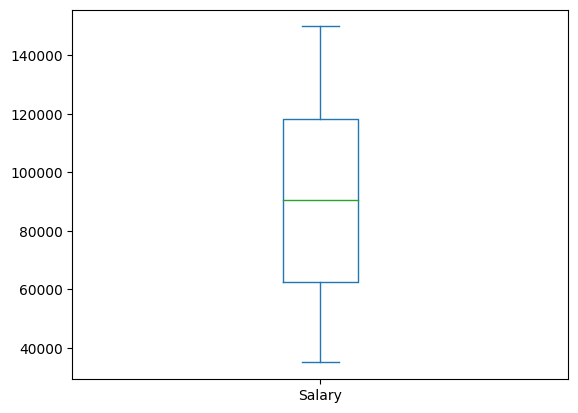

In [44]:
df['Salary'].plot(kind = 'box')

In [46]:
Q1_salary = np.quantile(df['Salary'], 0.25)
Q2_salary = np.quantile(df['Salary'], 0.50)
Q3_salary = np.quantile(df['Salary'], 0.75)
# print(Q1_salary, Q2_salary, Q3_salary)
df['Salary'].describe()

count       899.000000
mean      90479.672970
std       32743.875488
min       35013.000000
25%       62412.500000
50%       90730.000000
75%      118107.500000
max      149908.000000
Name: Salary, dtype: float64

In [43]:
IQR = (Q3_salary - Q1_salary)/2
print('IQR:',IQR)
Upper = Q3_salary + 1.5*IQR
Lower = Q1_salary - 1.5*IQR
[Lower, Upper]

IQR: 27847.5


[20641.25, 159878.75]

In [47]:
# categorical summary stats
df.describe(include=['string','bool'])

,First_Name,Gender,Senior_Management,Team
count,899,899,899,899
unique,200,3,2,10
top,Marilyn,Female,True,Client Services
freq,11,393,450,100


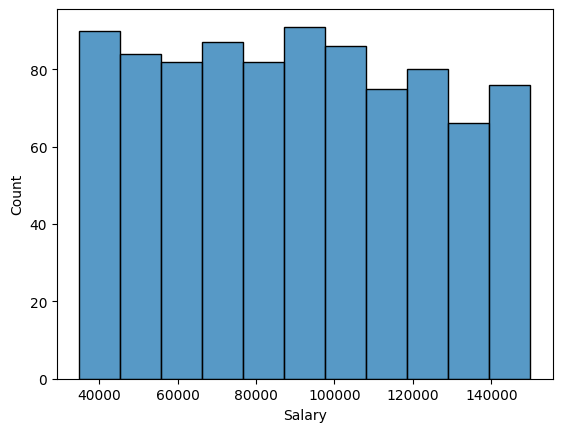

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Salary', data = df)
plt.show()

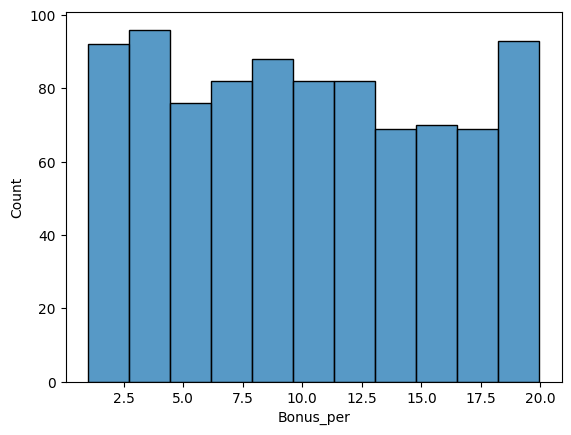

In [49]:
sns.histplot(x='Bonus_per', data = df)
plt.show()

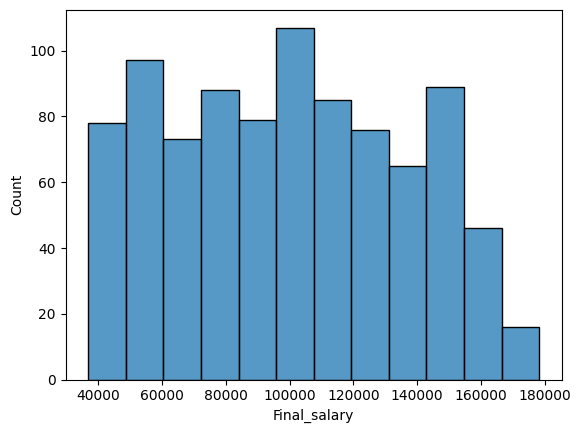

In [50]:
sns.histplot(x='Final_salary', data = df)
plt.show()

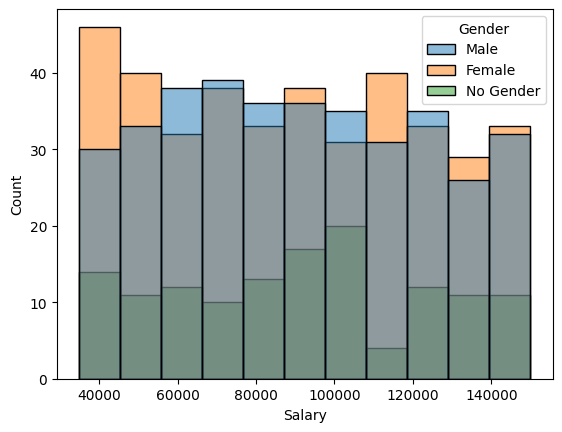

In [51]:
sns.histplot(x='Salary', hue = 'Gender', data = df)
plt.show()

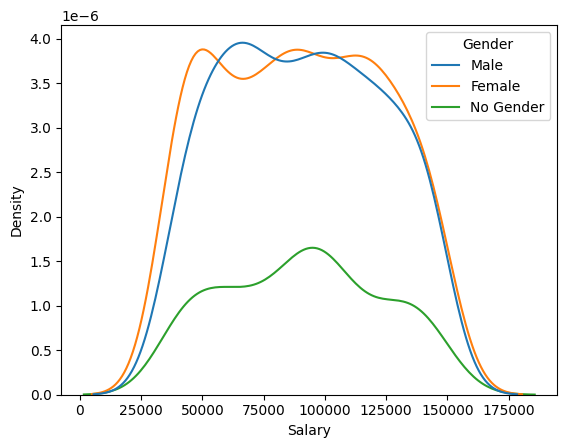

In [52]:
sns.kdeplot(x='Salary', hue = 'Gender', data = df)
plt.show()

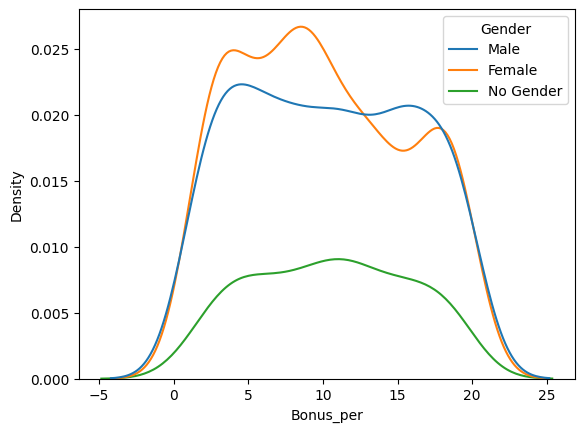

In [53]:
sns.kdeplot(x='Bonus_per', hue = 'Gender', data = df)
plt.show()

### Relationship of variables

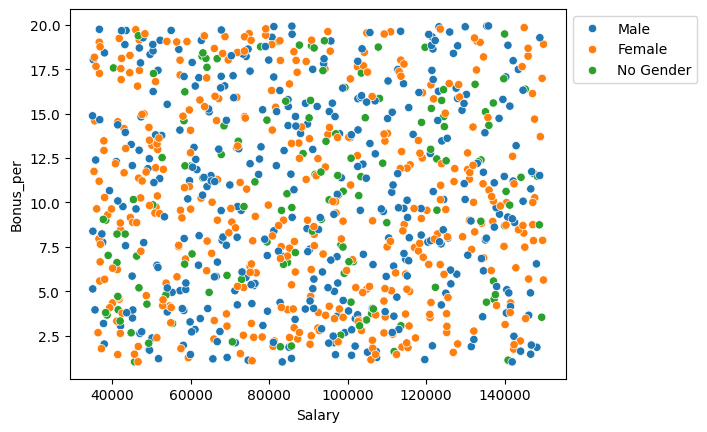

In [56]:
sns.scatterplot(x = 'Salary', y = 'Bonus_per', data = df, hue = 'Gender')
# placing the legend outside the plotting
plt.legend(bbox_to_anchor = (1,1), loc = 2)
plt.show()

In [57]:
df['Salary'].corr(df['Bonus_per'])

-0.01702025486966284

In [58]:
len(df[df['Bonus_per']>=19])

54

In [59]:
bonus19 = df[df['Bonus_per']>19].sort_values(['Bonus_per'], ascending = False)

In [60]:
bonus19.head()

,First_Name,Gender,Start_Date,Last_Login_Time,Salary,Bonus_per,Senior_Management,Team,Final_salary
442,Robert,Male,2007-03-11,11:20 AM,135882,19.944,False,Legal,162982.31
136,Sean,Male,1996-05-04,8:59 PM,135490,19.934,False,Marketing,162498.58
304,Robert,Male,2014-11-18,5:00 AM,85799,19.930,False,Finance,102898.74
742,Michael,Male,2002-08-31,1:20 AM,81206,19.908,True,Distribution,97372.49
317,Philip,Male,1989-08-02,11:21 AM,129968,19.897,False,Finance,155827.73


### Task: Line chart on salary and startdate by team or gender

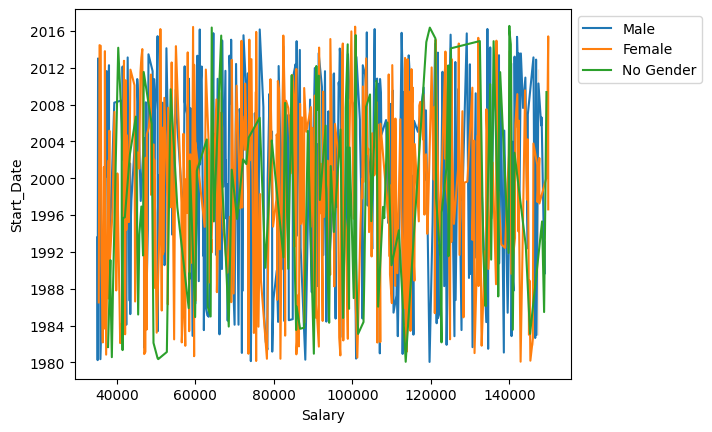

In [81]:
sns.lineplot(x = 'Salary', y = 'Start_Date', data = df, hue = 'Gender')
plt.legend(bbox_to_anchor = (1,1), loc = 2)
plt.show()